In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
def h(w, xi):
    return np.dot(w, xi)

In [3]:
def hs(w, xi):
    return np.sign(np.dot(w, xi))

In [4]:
def idx(w, xi, yi):
    return 0 if hs(w, xi) == yi else 1

In [5]:
def Ls(w, X, y):
    return (1/len(X)) * np.sum([idx(w, xi, y[i]) for i , xi in enumerate(X)])

In [6]:
def MSE(w, X, y):
    return (1/len(X))*np.sum([(y[i] - hs(w, xi))**2 for i , xi in enumerate(X)])

In [7]:
def Gradient(w, X, y):
    return (1/len(X))*np.sum([2*xi*(y[i] - hs(w, xi)) for i , xi in enumerate(X)])

## PLA :

In [8]:
def Pla(w0, X, y):
    t = 0
    w = np.copy(w0)
    loss = Ls(w, X, y)

    while(loss!= 0):
        for i, xi in enumerate(X):
            if hs(w, xi) * y[i] <= 0:
                w += y[i]*xi
            t += 1
        loss = Ls(w, X, y)
    return w, loss, t

In [9]:
def Pocket(w0, X, y, Tmax=1e3):
    t = 0
    w = np.copy(w0)
    loss = Ls(w, X, y)

    while(t < Tmax):
        for i, xi in enumerate(X):
            if hs(w, xi) * y[i] <= 0:
                w += y[i]*xi
            t += 1
        loss = Ls(w, X, y)
    return w, loss, t

### ADALINE :

In [10]:
def Adaline(w0, X, y, eps= 1e-8):
    t = 0
    w = np.copy(w0)
    loss = MSE(w, X, y)

    print("Loss init: ", loss)

    while abs(Gradient(w, X, y)) > eps:
        for i, xi in enumerate(X):
            ei =  y[i] - hs(w, xi)
            w += 2*ei*xi
            t += 1
        loss = MSE(w, X, y)
    return w, loss, t

### Data :

In [11]:
X, y = datasets.make_blobs(
    n_samples=120, n_features=2, centers=3, cluster_std=1, random_state=2
)

In [12]:
def prepare_data(X, y):
    x_ = np.hstack((np.ones((len(X), 1)), X))
    y_ = np.where(y==0, -1, 1)
    return x_, y_

In [13]:
X, y = prepare_data(X, y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

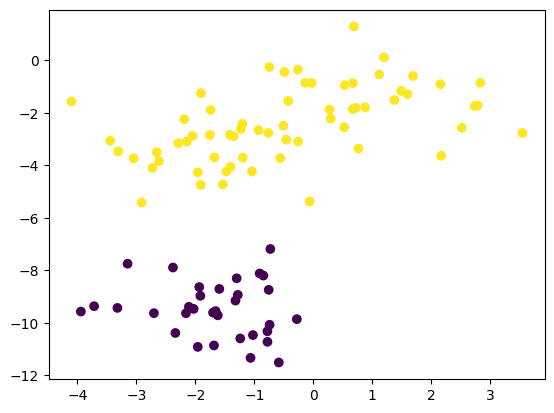

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 1], X_train[:, 2], marker="o", c=y_train)
plt.show()

In [16]:
w0 = np.random.random(X.shape[1])

In [17]:
w_pla, loss_pla, t_pla = Pla(w0, X_train, y_train)
w_pla, loss_pla, t_pla

(array([42.11027035, -1.19941224,  7.78369469]), 0.0, 864)

In [18]:
w_pocket, loss_pocket, t_pocket = Pocket(w0, X_train, y_train, Tmax=1e4)
w_pocket, loss_pocket, t_pocket

(array([42.11027035, -1.19941224,  7.78369469]), 0.0, 10080)

In [19]:
w_adaline, loss_adaline, t_adaline = Adaline(w0, X_train, y_train, eps=1e-2)
w_adaline, loss_adaline, t_adaline

Loss init:  2.0416666666666665


(array([60.11027035,  3.50628755,  8.04785223]), 0.0, 192)

In [49]:
def plot_line(ws, X, y):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
    
    min_x0 = np.amin(X[:, 1])
    max_x1 = np.amax(X[:, 1])
    
    x = np.linspace(min_x0, max_x1, 100)

    for w in ws:
        y = (-w[1] * x - w[0]) / w[2]
        plt.plot(x, y)
        
    plt.show()

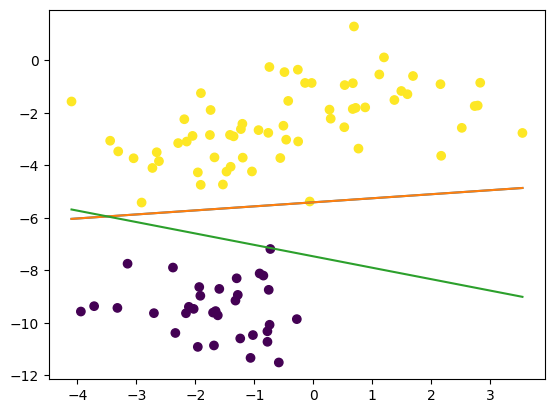

In [50]:
plot_line((w_pla, w_pocket, w_adaline), X_train, y_train)

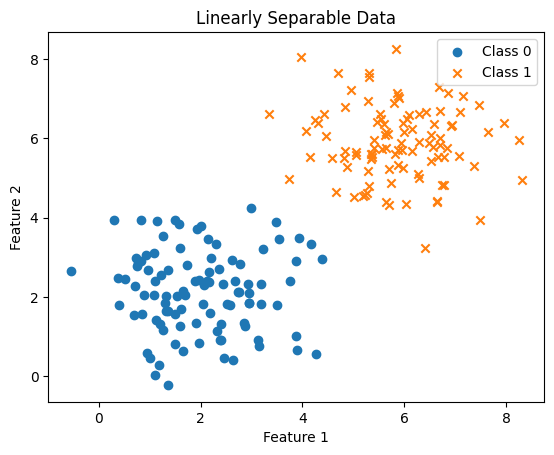

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

# Define the parameters for two classes
class1_mean = [2, 2]
class2_mean = [6, 6]
covariance = [[1, 0], [0, 1]]  # Covariance matrix (identity matrix for simplicity)

# Generate random data points for each class
num_samples_per_class = 100
class1_data = np.random.multivariate_normal(class1_mean, covariance, num_samples_per_class)
class2_data = np.random.multivariate_normal(class2_mean, covariance, num_samples_per_class)

# Create labels for the two classes (0 and 1)
class1_labels = np.zeros(num_samples_per_class)
class2_labels = np.ones(num_samples_per_class)

# Concatenate the data and labels
data = np.vstack((class1_data, class2_data))
labels = np.hstack((class1_labels, class2_labels))

# Shuffle the data and labels
shuffle_indices = np.arange(data.shape[0])
np.random.shuffle(shuffle_indices)
data = data[shuffle_indices]
labels = labels[shuffle_indices]

# Visualize the data
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], label="Class 0", marker="o")
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], label="Class 1", marker="x")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Linearly Separable Data")
plt.show()

In [55]:
def data_gener(n_samples=120, cluster_std=1, random_state=2):
    #np.random.seed(random_state)

    class1_mean = [2, 2]
    class2_mean = [6, 6]
    covariance = [[cluster_std, 0], [0, cluster_std]]

    class1_data = np.random.multivariate_normal(class1_mean, covariance, n_samples)
    class2_data = np.random.multivariate_normal(class2_mean, covariance, n_samples)

    class1_labels = np.zeros(n_samples)
    class2_labels = np.ones(n_samples)
    
    data = np.vstack((class1_data, class2_data))
    labels = np.hstack((class1_labels, class2_labels))
    
    shuffle_indices = np.arange(data.shape[0])
    np.random.shuffle(shuffle_indices)
    data = data[shuffle_indices]
    labels = labels[shuffle_indices]

    return prepare_data(data, labels)

In [68]:
X_, y_ = data_gener(n_samples=120 , cluster_std=0.8)

In [72]:
w_pla, _, _ = Pla(w0, X_, y_)

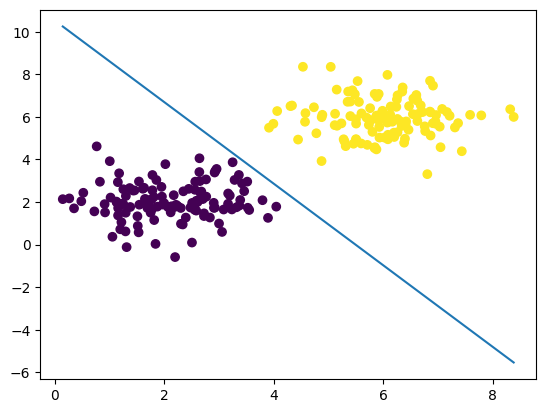

In [73]:
plot_line((w_pla,), X_, y_)